In [1]:
from utils import *
from plotter import *

%reload_ext autoreload
%autoreload 2

## Task 3: Approximating nonlinear vector fields
Read the files and data points.

x0 shape: (2000, 2)
x1 shape: (2000, 2)


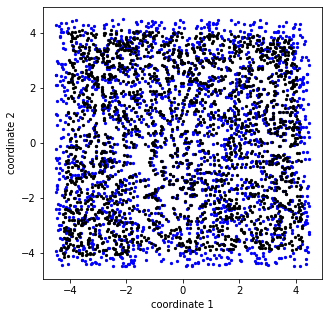

In [2]:
x0, x1 = read_points()

### Part 1: Approximate the vector field using Linear Operator
Compute vector field using finite difference. Compute the matrix $A$ using least square formula $min ||F - X A^T||^2$.

In [3]:
t_start = 0.0
t_end = 0.1
dt = t_end - t_start

vector_field = vector_field(x0, x1, dt)
matrix_a = compute_matrix_a(x0, vector_field)
print(f' matrix A: \n {matrix_a}')

 matrix A: 
 [[-0.10016012 -0.00253494]
 [ 0.00867272 -0.43267138]]


Solve the system of equations $\dot x = A x$ and compute error using norm 2.

Linear error: 0.01863790922187241


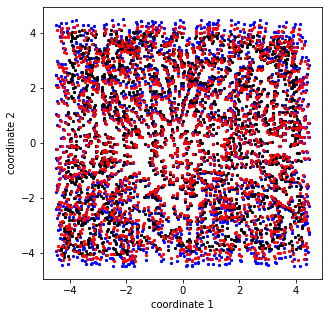

In [4]:
solver = SolverLinear(x0, t_start, t_end, matrix_a)
x1_linear = solver.solve_linear_system()
error_linear = compute_error(x1, x1_linear)
print(f'Linear error: {error_linear}')
plot_points(x0, x1, x1_linear)

Plot the vector fields

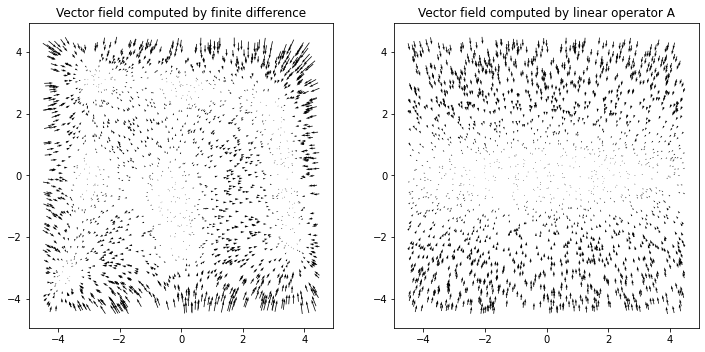

In [5]:
vector_field_computed = (x1_linear - x0)/dt
title1 = 'Vector field computed by finite difference'
title2 = 'Vector field computed by linear operator A'
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0] = plot_vector_fields(vector_field[:,0], vector_field[:,1], x0[:,0], x0[:,1], axes[0], title1)
axes[1] = plot_vector_fields(vector_field_computed[:,0], vector_field_computed[:,1], x0[:,0], x0[:,1], axes[1], title2)

### Part 2: Approximate the vector field using radial basis funciton

Set the values of $\epsilon$, the number of center points $L$ as a grid, and the $cond$ value.

In [6]:
EPSILON = 6.2
L = 10j
GRID_b = np.mgrid[x0.min():x0.max():L, x0.min():x0.max():L]
GRID_b = GRID_b.reshape((2,GRID_b[0].size)).T
GRID_b[:, [1, 0]] = GRID_b[:, [0, 1]]
R_COND = 1e-5

Compute coefficients $C$ in the minimization problem: $min ||F - \Phi (X) C^T||^2$.

In [7]:
coefficients = radial_basis_lst_sqr_approx(x0, vector_field, GRID_b, EPSILON, R_COND)

matrix: (100, 100)
target: (100, 2)
coefficients: (100, 2)


Solve the system of equations $\dot x = C \phi$ and compute error using norm 2.

Linear error: 0.0005768447954418471


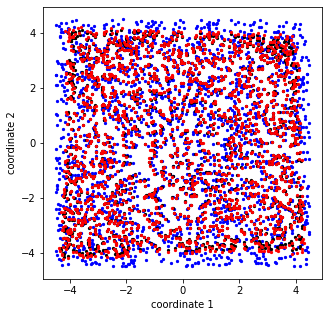

In [8]:
solver = SolverRadialBasis(x0, t_start, t_end, coefficients, GRID_b, EPSILON)
x1_nonlinear = solver.solve_linear_system()
error_nonlinear = compute_error(x1, x1_nonlinear)
print(f'Linear error: {error_nonlinear}')
plot_points(x0, x1, x1_nonlinear)

Plot the vector fields

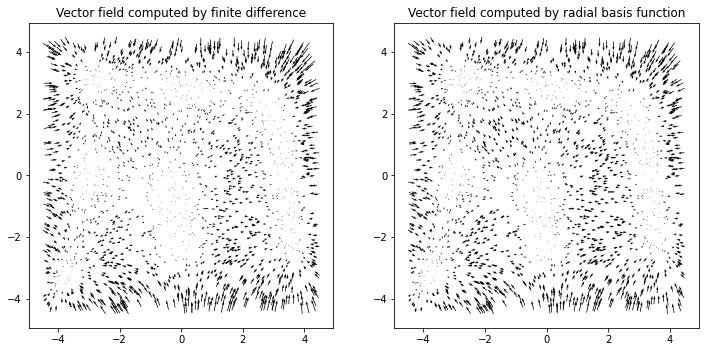

In [9]:
vector_field_computed = (x1_nonlinear - x0)/dt
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
title3 = 'Vector field computed by radial basis function'
axes[0] = plot_vector_fields(vector_field[:,0], vector_field[:,1], x0[:,0], x0[:,1], axes[0], title1)
axes[1] = plot_vector_fields(vector_field_computed[:,0], vector_field_computed[:,1], x0[:,0], x0[:,1], axes[1], title3)

### Part 3: Solve for longer time

solve the ode for a longer period of time.

In [10]:
t_end = 5

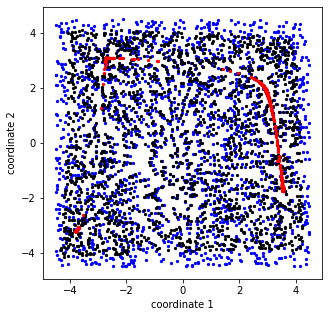

In [11]:
solver = SolverRadialBasis(x0, t_start, t_end, coefficients, GRID_b, EPSILON)
x1_nonlinear = solver.solve_linear_system()
error_nonlinear = compute_error(x1, x1_nonlinear)
plot_points(x0, x1, x1_nonlinear)

### Extra

In [12]:
def compute_f(phi_x, coefficients):
    return  phi_x @ coefficients

In [13]:
def plot_nonlinear(xx, f):
    # example nonlinear vector field

    f1 = f[:,0].reshape(grid_shape)
    f2 = f[:,1].reshape(grid_shape)
    xx1 = xx[:,0].reshape(grid_shape)
    xx2 = xx[:,1].reshape(grid_shape)

    ax1 = plot_phase_portrait_linear(f1, f2, xx1, xx2)
    plt.scatter(x1_nonlinear[:,0], x1_nonlinear[:,1], s=5, c="red")
    plt.show()

In [14]:
# define notebook parameters
w = 2

xx = np.mgrid[-w:w:100j, -w:w:100j]
grid_shape = xx.shape[1:]
xx = xx.reshape((2,xx[0].size)).T
xx[:, [1, 0]] = xx[:, [0, 1]]
print(xx.shape)
phi_x = radial_basis(xx, GRID_b, EPSILON)
f = compute_f(phi_x, coefficients)
print(coefficients.shape)
print(phi_x.shape)
print(f.shape)
# parameter alpha
# plot_nonlinear(xx, f)


(10000, 2)
(100, 2)
(10000, 100)
(10000, 2)
